##### Домашняя работа по теме "Библиотека Matplotlib & Seaborn. Визуализаця данных"

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек.
    Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и какие гипотезы на ее основе можно выдвинуть.


In [10]:
invest_company = pd.read_csv('investments_VC.csv', encoding = "ISO-8859-1")
invest_company.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
 market                 45470 non-null object
 funding_total_usd      49438 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null float64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null float64
venture       

###### Диаграмма 1. Топ-10 стран с наибольшим объемом рынка краудфандинга 

In [12]:
company1 = invest_company[['country_code','equity_crowdfunding']].groupby('country_code').sum().sort_values(by='equity_crowdfunding', ascending=False).reset_index().head(10)
company1.head(10)

,country_code,equity_crowdfunding
0,USA,188774355.0
1,GBR,51147518.0
2,DEU,11490140.0
3,CAN,7293500.0
4,JPN,5800000.0
5,ISR,3090000.0
6,KOR,2000102.0
7,AUS,1650000.0
8,IRL,1247816.0
9,FIN,1066770.0


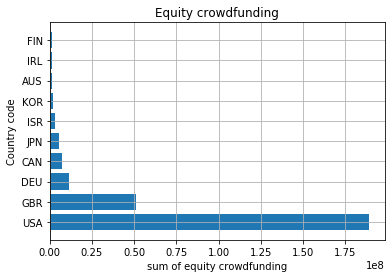

In [15]:
plt.barh(company1['country_code'], company1['equity_crowdfunding'])
plt.xlabel('sum of equity crowdfunding')
plt.ylabel('Country code')
plt.title('Equity crowdfunding')
    
plt.grid()

США является абсолютным лидером по размерам финансирования стартапов через краудфандинг.

###### Диаграмма 2. Количество стартапов в год 

In [16]:
company2 = invest_company[['founded_year','name']].groupby('founded_year').count().sort_values(by='founded_year', ascending=True)
company2.head(10)

,name
founded_year,
1902.0,2
1903.0,1
1905.0,1
1906.0,5
1907.0,1
1908.0,1
1910.0,2
1911.0,2
1912.0,6


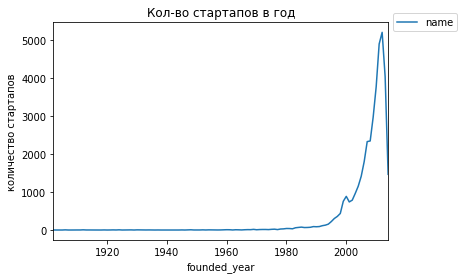

In [18]:
company2.plot()
plt.title("Кол-во стартапов в год")
plt.legend(title="", loc="center left", bbox_to_anchor=(1, 0, 4, 2))
plt.ylabel('количество стартапов')
plt.show()

Количество стартапов резко выросло в начале 2000 года, пик пришелся на 2010 год.

###### Диаграмма 3. Объемы финансирования стартапов в зависимости от вида финансирования

In [20]:
company3 = invest_company[['founded_year','venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity']].groupby('founded_year').sum().sort_values(by='founded_year', ascending=True).tail(10)
company3

,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity
founded_year,,,,,,,,
2005.0,2.463408e+10,1325500.0,228085702.0,15614835.0,4.252264e+09,143508568.0,101257108.0,6.305620e+09
2006.0,2.670279e+10,6415000.0,369840214.0,26107063.0,1.795016e+09,179303238.0,273429394.0,5.267196e+09
2007.0,3.363308e+10,12616229.0,185803956.0,55645661.0,7.836890e+09,266544332.0,599520569.0,5.937058e+09
2008.0,2.327925e+10,8671996.0,244770545.0,28724704.0,1.733862e+09,271081561.0,124148646.0,3.913573e+09
2009.0,2.391552e+10,25646572.0,208319676.0,51504603.0,1.847809e+09,310850078.0,55636690.0,2.968836e+09
2010.0,2.148656e+10,16525783.0,115614276.0,53851058.0,1.068225e+09,369867218.0,324268987.0,3.582654e+09
2011.0,1.808079e+10,24044071.0,117847959.0,70983657.0,1.427885e+09,386755959.0,89714532.0,2.556336e+09
2012.0,1.187866e+10,24872059.0,87096634.0,63583432.0,1.149289e+09,305189251.0,57896787.0,3.969817e+09
2013.0,5.462091e+09,47091931.0,34050481.0,41633793.0,4.893877e+08,183111005.0,26512548.0,1.327656e+09


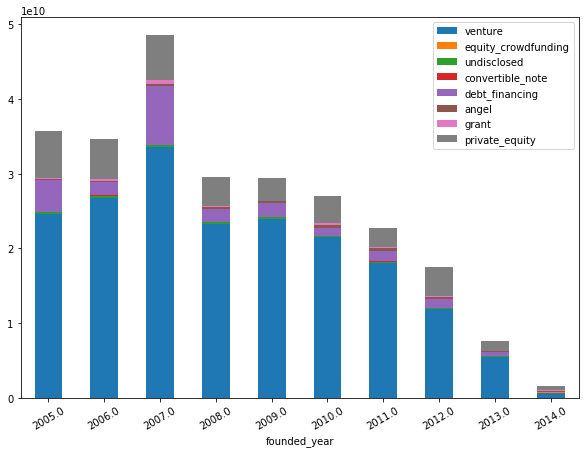

In [29]:
company3[list(filter(lambda x: x != 'Инвестирование в стартапы', company3.columns))].plot(kind='bar', rot=30, stacked=True)

С 2005 по 2014 год в мире объем венчурного финансирования в стартапы составлял большую долю всех инвестиций, далее - собственный капитал и гранты. Наибольший пик инвестиций пришелся на 2007 год. После кризиса 2008 года ниблюдается существенное сокращение венчурных инвестиций.

###### Диаграмма 4. Топ-10 рынков стартапов по источникам финансирования

In [30]:
company4 = invest_company[[' market ','venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity']].groupby(' market ').sum().sort_values(by='venture', ascending=False).head(10)
company4

,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity
market,,,,,,,,
Biotechnology,5.019104e+10,4629000.0,343539593.0,179961477.0,9.011835e+09,37731235.0,1.119789e+09,7.660596e+09
Software,2.913889e+10,20108116.0,343248211.0,45041930.0,3.105574e+09,216444395.0,4.644912e+07,6.031324e+09
Clean Technology,1.944058e+10,11119016.0,410471772.0,20124380.0,5.616456e+09,15855672.0,5.474119e+08,1.048354e+10
Health Care,1.821725e+10,1025000.0,116603429.0,136506183.0,3.689940e+09,23839913.0,3.661290e+08,4.422248e+09
E-Commerce,1.517819e+10,10240642.0,778457363.0,15752042.0,1.138501e+09,197600996.0,6.637122e+06,4.138223e+09
Enterprise Software,1.375703e+10,46553.0,74266137.0,19803966.0,1.286473e+09,84499122.0,1.735125e+07,1.381407e+09
Mobile,1.363873e+10,404419.0,107386249.0,55701198.0,3.120950e+10,254899057.0,7.654236e+07,3.244764e+09
Advertising,1.052964e+10,2178501.0,104143006.0,2378000.0,3.944597e+08,67587874.0,8.099820e+05,1.258010e+09
Semiconductors,1.010452e+10,100000.0,130928327.0,22430224.0,4.380710e+08,8669072.0,2.530000e+07,8.089123e+08


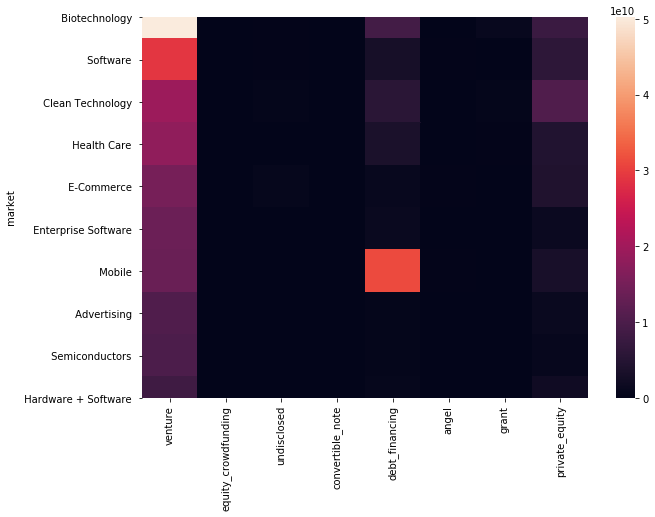

In [40]:
sns.heatmap(company4)

В топ-10 видов стартапов по объему венчурного финансирования входит производители сотовых телефонов, которые также активно используют кредиты.
    Биотехнологии и производители ПО больше всех используют в качестве источников финансирования: венчурное с маленькой долей кредитов и собственных средств


###### Диаграмма 5. Объемы финансирования стартапов в России и их виды

In [36]:
company5 = invest_company[['founded_year','country_code', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity']]

In [35]:
company5.head(10)
year = invest_company['founded_year'] >= 2007
country_rus = invest_company['country_code'] == 'RUS'
company_finall= company5.loc[year&country_rus].groupby('founded_year').sum()
company_finall

,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity
founded_year,,,,,,,,
2007.0,11500000.0,0.0,0.0,0.0,0.0,1000000.0,406000.0,0.0
2008.0,235600000.0,0.0,95635000.0,0.0,0.0,0.0,0.0,45000000.0
2009.0,80800000.0,0.0,0.0,0.0,497000.0,1570000.0,0.0,0.0
2010.0,182275000.0,0.0,0.0,0.0,354273.0,3166000.0,5315000.0,0.0
2011.0,310746000.0,0.0,15600000.0,0.0,190000.0,1300000.0,3151000.0,259000000.0
2012.0,39154000.0,0.0,0.0,0.0,805000.0,3155000.0,3105700.0,0.0
2013.0,5310000.0,0.0,0.0,0.0,3000000.0,100000.0,72200.0,0.0
2014.0,0.0,0.0,0.0,0.0,0.0,16000.0,0.0,0.0


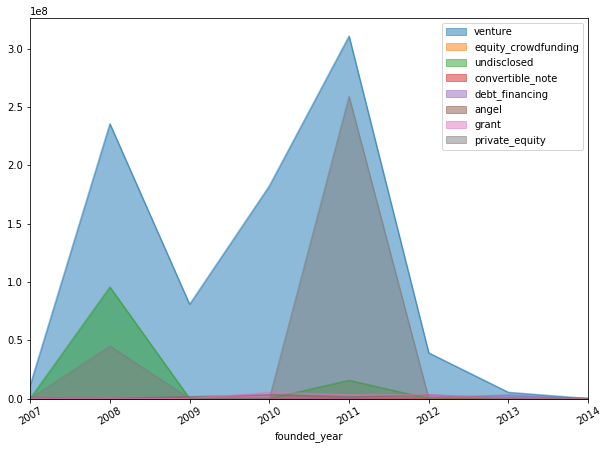

In [41]:
company_finall[list(filter(lambda x: x != 'Инвестиции в России', company_finall.columns))].plot(kind='area', rot=30, stacked=False)

Пик венчурных инвестиций в России пришлись на 2008 и  2011 гг, при этом значительную долю источников в 2008 году также составляли скрытые и частный капитал. В 2011 году наряду с венчурной инвестицией большую долю составили частные инвестиции.